In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [9]:
model = tf.keras.models.Sequential()

In [10]:
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="SAME", strides=1, 
                              input_shape=[28, 28, 1]))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding="SAME"))
model.add(keras.layers.ReLU())
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="SAME", strides=1))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding="SAME"))
model.add(keras.layers.ReLU())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation=keras.layers.Softmax()))

In [11]:
(train_dataset, train_label), (test_dataset, test_label) = keras.datasets.mnist.load_data()

In [12]:
model.compile(optimizer=keras.optimizers.Adam(lr=2e-3), 
              loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
re_lu_2 (ReLU)               (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
re_lu_3 (ReLU)               (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [29]:
history = model.fit(x = np.expand_dims(train_dataset, axis=3), y = train_label, batch_size=512,
                    epochs=20, validation_data=(np.expand_dims(test_dataset, axis=3), test_label))

In [28]:
history.history

In [16]:
import numpy as np

In [17]:
x = np.arange(25).reshape(5, 5)

In [18]:
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [19]:
x.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [20]:
model.save("MNIST-Classifier", save_format="tf")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: MNIST-Classifier/assets


In [21]:
m = keras.models.load_model("MNIST-Classifier")

In [22]:
import plotly.graph_objects as go

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
logs = history.history

In [25]:
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.rcParams['font.sans-serif'] = ['Monaco']

Text(0, 0.5, 'loss value')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


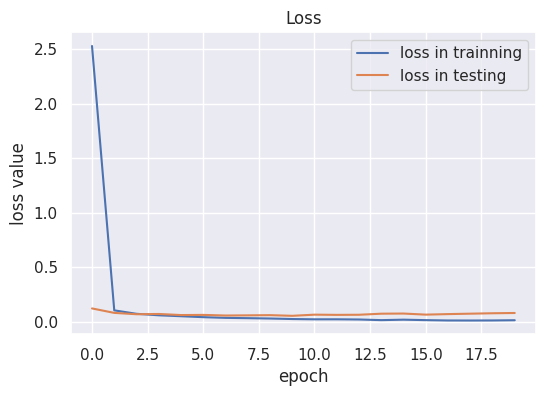

In [26]:
ax = sns.lineplot(x = range(len(logs['loss'])), y = logs['loss'], label="loss in trainning")
ax = sns.lineplot(x = range(len(logs['loss'])), y = logs['val_loss'], label="loss in testing")
ax.set_title("Loss")
ax.set_xlabel("epoch")
ax.set_ylabel("loss value")

Text(0, 0.5, 'accuracy')

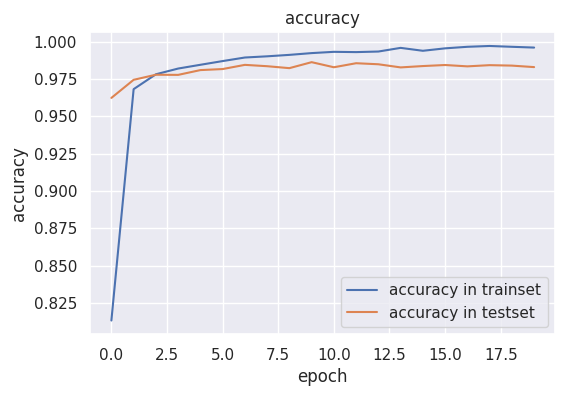

In [27]:
ax = sns.lineplot(x = range(len(logs['loss'])), y = logs['accuracy'], label="accuracy in trainset")
ax = sns.lineplot(x = range(len(logs['loss'])), y = logs['val_accuracy'], label="accuracy in testset")
ax.set_title("accuracy")
ax.set_xlabel("epoch")
ax.set_ylabel("accuracy")